# Load libraries

In [1]:
library(tidyverse)
library(readxl)
library(lubridate)
library(Metrics)
library(rpart)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'Metrics' was built under R version 3.6.3"Warning message:
"package 'rpart' was built under R version 3.6.3"

# Load transaction dataset

In [2]:
setwd("C:/Users/Jason Chong/Documents/Forage ANZ/Data")
df = read_excel("transaction.xlsx")
head(df)

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in C3052 / R3052C3: got 'THE DISCOUNT CHEMIST GROUP'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in C4360 / R4360C3: got 'LAND WATER & PLANNING East Melbourne'"

status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
authorized,1,NA,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NA,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
authorized,0,NA,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NA,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
authorized,1,NA,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NA,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
authorized,1,NA,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NA,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
authorized,1,NA,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NA,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
posted,NA,NA,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NA,NA,Robert,...,20,NA,NA,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NA,debit


# Data preparation 

In [3]:
summary(df)

    status          card_present_flag bpay_biller_code   account         
 Length:12043       Min.   :0.000     Min.   :0        Length:12043      
 Class :character   1st Qu.:1.000     1st Qu.:0        Class :character  
 Mode  :character   Median :1.000     Median :0        Mode  :character  
                    Mean   :0.803     Mean   :0                          
                    3rd Qu.:1.000     3rd Qu.:0                          
                    Max.   :1.000     Max.   :0                          
                    NA's   :4326      NA's   :11160                      
   currency           long_lat         txn_description    merchant_id       
 Length:12043       Length:12043       Length:12043       Length:12043      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                       

In [4]:
str(df)

Classes 'tbl_df', 'tbl' and 'data.frame':	12043 obs. of  23 variables:
 $ status           : chr  "authorized" "authorized" "authorized" "authorized" ...
 $ card_present_flag: num  1 0 1 1 1 NA 1 1 1 NA ...
 $ bpay_biller_code : num  NA NA NA NA NA NA NA NA NA NA ...
 $ account          : chr  "ACC-1598451071" "ACC-1598451071" "ACC-1222300524" "ACC-1037050564" ...
 $ currency         : chr  "AUD" "AUD" "AUD" "AUD" ...
 $ long_lat         : chr  "153.41 -27.95" "153.41 -27.95" "151.23 -33.94" "153.10 -27.66" ...
 $ txn_description  : chr  "POS" "SALES-POS" "POS" "SALES-POS" ...
 $ merchant_id      : chr  "81c48296-73be-44a7-befa-d053f48ce7cd" "830a451c-316e-4a6a-bf25-e37caedca49e" "835c231d-8cdf-4e96-859d-e9d571760cf0" "48514682-c78a-4a88-b0da-2d6302e64673" ...
 $ merchant_code    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ first_name       : chr  "Diana" "Diana" "Michael" "Rhonda" ...
 $ balance          : num  35.39 21.2 5.71 2117.22 17.95 ...
 $ date             : POSIXct, format: "2

In [5]:
# Change the format of the date column 
df$date = as.Date(df$date, format = "%d/%m/%Y")

In [6]:
# The dataset only contain records for 91 days, one day is missing 
date_range = seq(min(df$date), max(df$date), by = 1)
date_range[!date_range %in% df$date]

[1] "2018-08-16"

In [7]:
# Derive weekday and hour data of each transaction 
df$extraction = as.character(df$extraction)
df$hour = hour(as.POSIXct(substr(df$extraction,12,19), format = "%H:%M:%S"))
df$weekday = weekdays(df$date)

In [8]:
# Confirm the one-to-one link of account_id and customer_id
df %>% select(account, customer_id) %>% unique() %>% nrow()

[1] 100

In [9]:
# Split customer and merchant long_lat into individual columns for analysis
dfloc = df[, c("long_lat", "merchant_long_lat")]
dfloc = dfloc %>% separate("long_lat", c("c_long", "c_lat"), sep = " ")
dfloc = dfloc %>% separate("merchant_long_lat", c("m_long", "m_lat"), sep = " ")
dfloc = data.frame(sapply(dfloc, as.numeric))
df = cbind(df, dfloc)

In [10]:
head(df[, c("long_lat", "c_long", "c_lat", "merchant_long_lat", "m_long", "m_lat")])

long_lat,c_long,c_lat,merchant_long_lat,m_long,m_lat
153.41 -27.95,153.41,-27.95,153.38 -27.99,153.38,-27.99
153.41 -27.95,153.41,-27.95,151.21 -33.87,151.21,-33.87
151.23 -33.94,151.23,-33.94,151.21 -33.87,151.21,-33.87
153.10 -27.66,153.10,-27.66,153.05 -26.68,153.05,-26.68
153.41 -27.95,153.41,-27.95,153.44 -28.06,153.44,-28.06
151.22 -33.87,151.22,-33.87,NA,NA,NA


In [11]:
# Check the range of customer location
# Filtering out transactions for those who do not reside in Australia
df_temp = df %>% filter(!(c_long > 113 & c_long < 154 & c_lat > (-44) & c_lat < (-10)))
length(unique(df_temp$customer_id))

[1] 1

Location information suggests there is one customer who resides outside Australia. However, all of his/her transaction histories occured within Australia, therefore these records are included for further analysis. 

In [12]:
# Check the distribution of missing values
apply(df, 2, function(x) sum(is.na(x) | x == ""))

# Check the number of unique values for each column
apply(df, 2, function(x) length(unique(x)))

status card_present_flag  bpay_biller_code           account 
                0              4326             11160                 0 
         currency          long_lat   txn_description       merchant_id 
                0                 0                 0              4326 
    merchant_code        first_name           balance              date 
            11160                 0                 0                 0 
           gender               age   merchant_suburb    merchant_state 
                0                 0              4326              4326 
       extraction            amount    transaction_id           country 
                0                 0                 0                 0 
      customer_id merchant_long_lat          movement              hour 
                0              4326                 0                 0 
          weekday            c_long             c_lat            m_long 
                0                 0                 0              4326 
            m_lat 
             4326

status card_present_flag  bpay_biller_code           account 
                2                 3                 2               100 
         currency          long_lat   txn_description       merchant_id 
                1               100                 6              5726 
    merchant_code        first_name           balance              date 
                2                80             12006                91 
           gender               age   merchant_suburb    merchant_state 
                2                33              1610                 9 
       extraction            amount    transaction_id           country 
             9442              4457             12043                 1 
      customer_id merchant_long_lat          movement              hour 
              100              2704                 2                24 
          weekday            c_long             c_lat            m_long 
                7                87                85               719 
            m_lat 
              670

# Gather some interesting overall insights about the data

In [13]:
# Filter out purchase transactions only
# Assuming purchase transactions must be associated with a merchant (have a merchant id)
df_temp = df %>% filter(merchant_id != "")

# It turned out that is equivalent to excluding following categories of transactions
df_csmp = df %>% filter(!(txn_description %in% c("PAY/SALARY", "INTER BANK", "PHONE BANK", "PAYMENT")))

summary(df_csmp)

    status          card_present_flag bpay_biller_code   account         
 Length:7717        Min.   :0.0000    Min.   : NA      Length:7717       
 Class :character   1st Qu.:1.0000    1st Qu.: NA      Class :character  
 Mode  :character   Median :1.0000    Median : NA      Mode  :character  
                    Mean   :0.8026    Mean   :NaN                        
                    3rd Qu.:1.0000    3rd Qu.: NA                        
                    Max.   :1.0000    Max.   : NA                        
                                      NA's   :7717                       
   currency           long_lat         txn_description    merchant_id       
 Length:7717        Length:7717        Length:7717        Length:7717       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                       

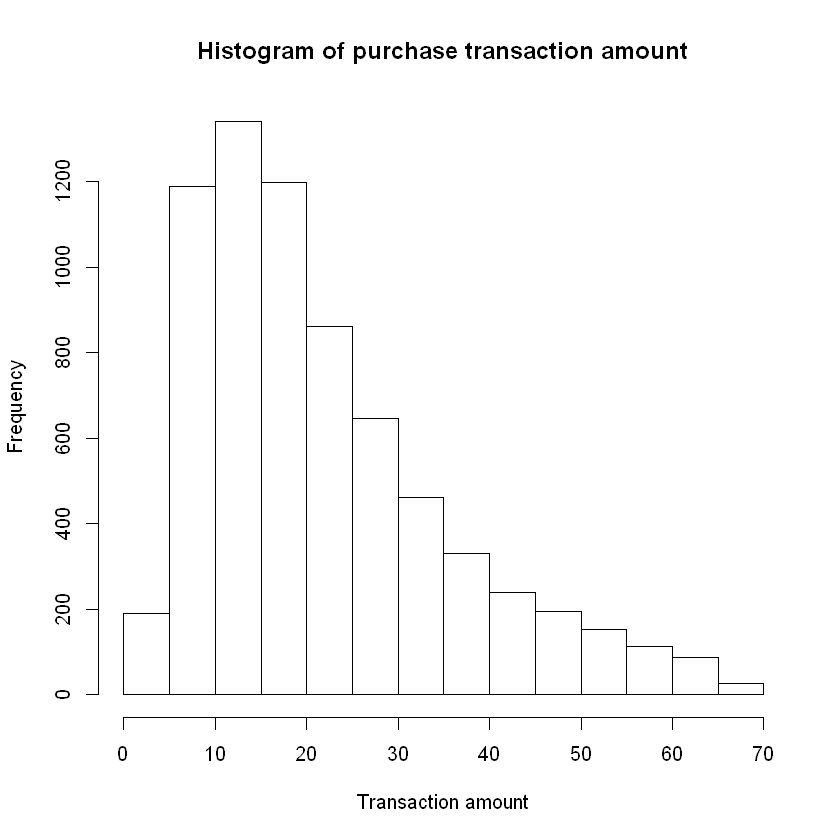

In [14]:
# Visualise the distribution of transaction amount
hist(df_csmp$amount[!df_csmp$amount %in% boxplot.stats(df_csmp$amount)$out], xlab = "Transaction amount", main = "Histogram of purchase transaction amount")

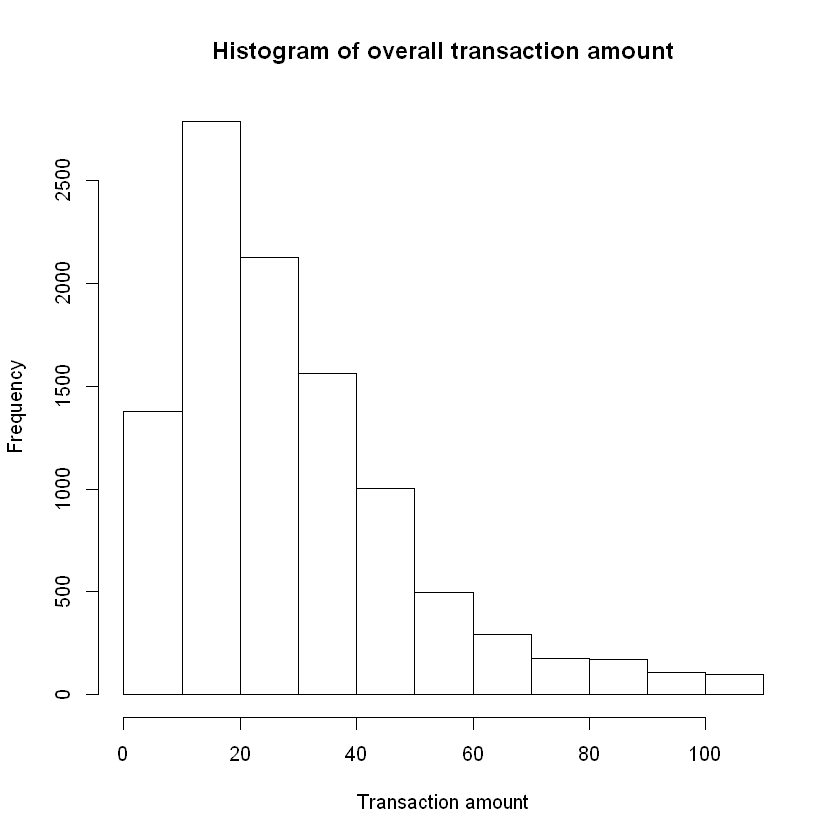

In [15]:
hist(df$amount[!df$amount %in% boxplot.stats(df$amount)$out], xlab = "Transaction amount", main = "Histogram of overall transaction amount")

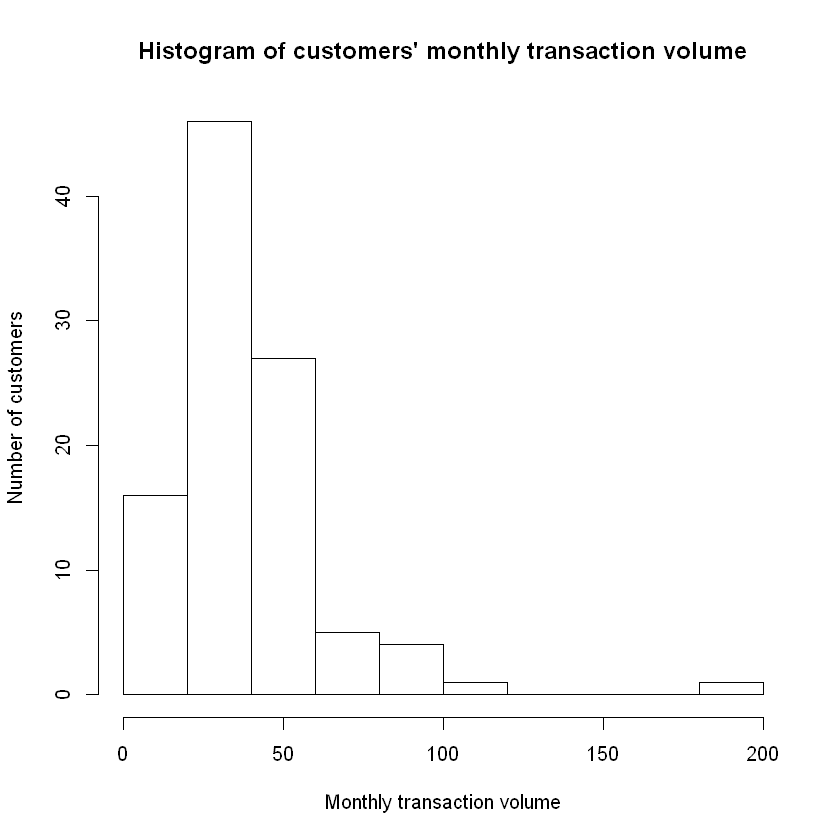

In [16]:
# Visualise customers' average monthly transaction volume
df2 = df %>% group_by(customer_id) %>% summarise(mon_avg_vol = round(n()/3, 0))
hist(df2$mon_avg_vol, xlab = "Monthly transaction volume", ylab = "Number of customers", main = "Histogram of customers' monthly transaction volume")

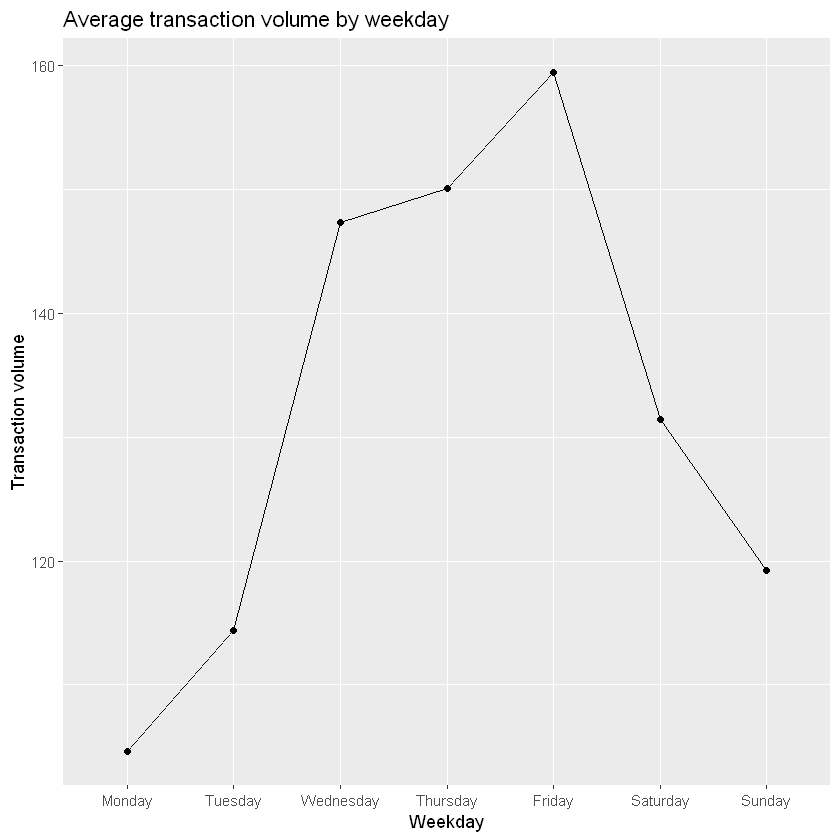

In [17]:
# Visualise transaction volume over an average week

df3 = df %>% select(date, weekday) %>% group_by(date, weekday) %>% summarise(daily_avg_vol = n()) %>% group_by(weekday) %>% summarise(avg_vol = mean(daily_avg_vol, na.rm = TRUE))
df3$weekday = factor(df3$weekday, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
ggplot(df3, aes(x = weekday, y = avg_vol)) + geom_point() + geom_line(aes(group = 1)) + ggtitle("Average transaction volume by weekday") + labs(x = "Weekday", y = "Transaction volume")

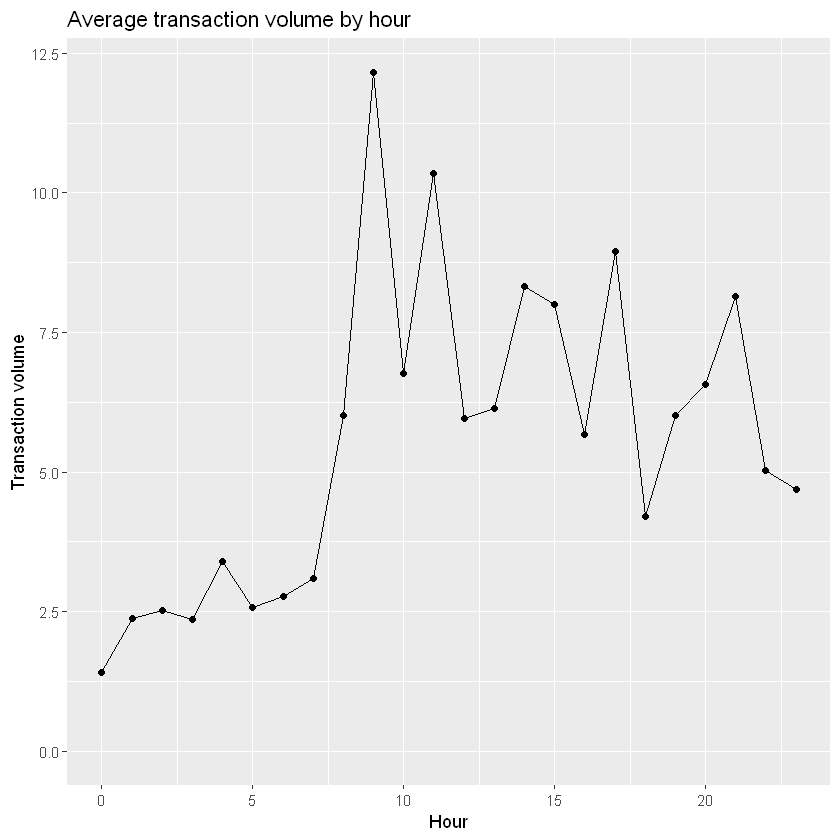

In [18]:
# Visualise transaction volume over an average week.
df4 <- df %>% select(date,hour) %>% group_by(date,hour) %>% summarize(trans_vol=n()) %>% group_by(hour) %>% summarize(trans_vol_per_hr = mean(trans_vol,na.rm=TRUE))

ggplot(df4, aes(x = hour, y=trans_vol_per_hr)) + geom_point() + geom_line(aes(group = 1)) + ggtitle("Average transaction volume by hour") + labs(x = "Hour", y = "Transaction volume") + expand_limits(y = 0)

In [19]:
# Check the salary payment frequency of each customer
df_inc = data.frame(customer_id = unique(df_csmp$customer_id))

# Create a mode function that will be used to find out what is the salary payment frequency
Mode = function(x){
    ux = unique(x)
    ux[which.max(tabulate(match(x, ux)))]
}

# Loop through all salary payments for each customer
# Assume the salary level is constant for each customer over the observed period
for (i in seq(nrow(df_inc))){
    trans_data = df[df$customer_id == df_inc$customer_id[i] & df$txn_description == "PAY/SALARY", c("amount", "date")] %>% group_by(date) %>% summarise(amount = sum(amount))
    total_s = sum(trans_data$amount)
    count = dim(trans_data)[1]
    if (count == 0){
        df_inc$freq[i] = NA
        df_inc$level[i] = NA
    } else {
        s = c()
        lvl = c()
        for (j in seq(count - 1)){
            s = c(s, (trans_data$date[j+1] - trans_data$date[j]))
            lvl = c(lvl, trans_data$amount[j]) 
        }
        lvl = c(lvl, tail(trans_data$amount, n = 1))
        df_inc$freq[i] = Mode(s)
        df_inc$level[i] = Mode(lvl)
    }
}

df_inc$annual_salary = df_inc$level / df_inc$freq * 365.25

In [20]:
head(df_inc)

customer_id,freq,level,annual_salary
CUS-2487424745,7,1013.67,52891.85
CUS-2142601169,7,1002.13,52289.71
CUS-1614226872,7,892.09,46547.98
CUS-4123612273,7,1068.04,55728.80
CUS-3026014945,14,2840.15,74097.48
CUS-860700529,14,1808.62,47185.60


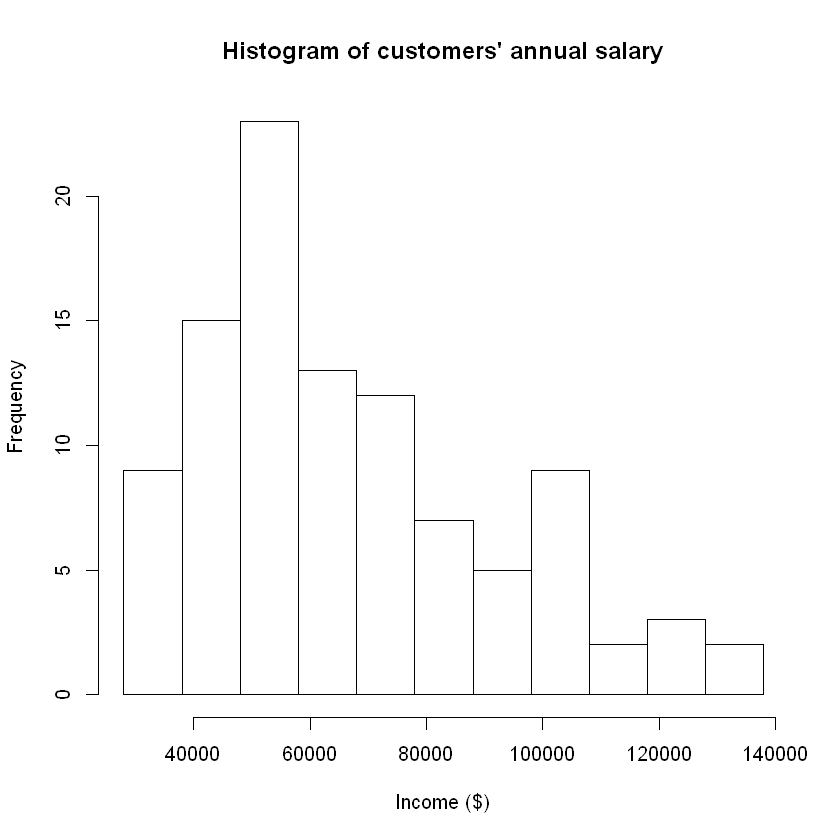

In [21]:
# Visualise the distribution of customers' annual salary
hist(df_inc$annual_salary[!is.na(df_inc$annual_salary)], breaks = c(seq(28000, 140000, by = 10000)), main = "Histogram of customers' annual salary", xlab = "Income ($)")

# Feature engineering

In [22]:
# Create a dataframe to store relevant features for customers
df_cus = df_csmp %>% select(customer_id, gender, age, amount, date, balance) %>% group_by(customer_id) %>% mutate(avg_no_weekly_trans = round(7*n()/length(unique(df$date)), 0), max_amt = max(amount), no_large_trans = sum(amount > 100), use_no_day = length(unique(date)), avg_trans_amt = mean(amount, na.rm = TRUE), med_bal = median(balance, na.rm = TRUE)) %>% select(-c("amount", "date", "balance")) %>% unique() 

# Create additional features
df_cus$age_below20 = ifelse(df_cus$age < 20, 1, 0)
df_cus$age_btw20n40 = ifelse(df_cus$age >= 20 & df_cus$age < 40, 1, 0)
df_cus$age_btw40n60 = ifelse(df_cus$age >= 40 & df_cus$age < 60, 1, 0)

In [23]:
# Investigate the state where customers live
# Assume they live where most transactions occured
df_region = df_csmp %>% group_by(customer_id, merchant_state) %>% summarise(trans_count = n()) %>% group_by(customer_id) %>% mutate(no_state = n()) %>% filter(trans_count == max(trans_count))

# For equal number of transactions between multiple states, pick the most likely state
n_occur = data.frame(table(df_region$customer_id))
cus_id_rep = n_occur$Var1[n_occur$Freq > 1]

state_by_cust_no = rev(names(sort(table(df_region$merchant_state), rev = TRUE)))
t = data.frame(customer_id = cus_id_rep, merchant_state = NA)

for (i in seq(length(cus_id_rep))){
    s = df_region$merchant_state[df_region$customer_id == cus_id_rep[i]]
    for (state in state_by_cust_no){
        if (state %in% s){
            t[i, 2] = state
            break
        }
    }
}

df_region <- df_region[!(df_region$customer_id %in% cus_id_rep), c(1,2)] %>% as.data.frame() %>% rbind(t) %>% rename(State = merchant_state)

head(df_region)

customer_id,State
CUS-1005756958,QLD
CUS-1117979751,WA
CUS-1140341822,VIC
CUS-1147642491,NSW
CUS-1196156254,SA
CUS-1220154422,NSW


In [24]:
# Merge all the features into a single dataframe
df_cus = df_cus %>% merge(df_inc) %>% merge(df_region)
head(df_cus)

customer_id,gender,age,avg_no_weekly_trans,max_amt,no_large_trans,use_no_day,avg_trans_amt,med_bal,age_below20,age_btw20n40,age_btw40n60,freq,level,annual_salary,State
CUS-1005756958,F,53,4,226.82,4,25,37.72625,1054.965,0,0,1,7,970.47,50637.74,QLD
CUS-1117979751,M,21,4,2885.85,1,31,76.45808,8444.820,0,1,0,14,3578.65,93364.42,WA
CUS-1140341822,M,28,5,1271.46,5,33,67.53138,6820.260,0,1,0,14,1916.51,50000.38,VIC
CUS-1147642491,F,34,6,432.92,5,39,51.12829,9572.950,0,1,0,7,1711.39,89297.89,NSW
CUS-1196156254,F,34,13,390.67,6,65,30.31049,22055.110,0,1,0,14,3903.73,101845.53,SA
CUS-1220154422,F,25,4,168.74,13,34,65.92896,8476.365,0,1,0,14,2282.36,59545.14,NSW


# Build a simple regression model to predict the annual salary for each customer

In [25]:
fit1 = lm(annual_salary ~. - customer_id - level - freq, data = df_cus)
summary(fit1)


Call:
lm(formula = annual_salary ~ . - customer_id - level - freq, 
    data = df_cus)

Residuals:
   Min     1Q Median     3Q    Max 
-36365 -17552  -4231  13235  68180 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)         -5.461e+03  3.910e+04  -0.140   0.8893  
genderM              4.668e+03  5.581e+03   0.837   0.4053  
age                  7.133e+02  4.938e+02   1.444   0.1524  
avg_no_weekly_trans -8.705e+02  9.622e+02  -0.905   0.3682  
max_amt              2.013e+00  3.787e+00   0.532   0.5964  
no_large_trans       5.850e+02  1.108e+03   0.528   0.5989  
use_no_day           7.104e+01  3.292e+02   0.216   0.8297  
avg_trans_amt       -1.905e+02  1.270e+02  -1.500   0.1375  
med_bal              1.624e-01  8.231e-02   1.973   0.0518 .
age_below20          6.522e+04  3.147e+04   2.072   0.0413 *
age_btw20n40         5.701e+04  2.663e+04   2.141   0.0352 *
age_btw40n60         4.615e+04  2.140e+04   2.157   0.0339 *
StateNT             

In [26]:
MASS::stepAIC(fit1)

Start:  AIC=2043.34
annual_salary ~ (customer_id + gender + age + avg_no_weekly_trans + 
    max_amt + no_large_trans + use_no_day + avg_trans_amt + med_bal + 
    age_below20 + age_btw20n40 + age_btw40n60 + freq + level + 
    State) - customer_id - level - freq

                      Df  Sum of Sq        RSS    AIC
- State                5 1409188476 5.4675e+10 2036.0
- use_no_day           1   29889747 5.3296e+10 2041.4
- no_large_trans       1  178928443 5.3445e+10 2041.7
- max_amt              1  181364785 5.3447e+10 2041.7
- gender               1  449087243 5.3715e+10 2042.2
- avg_no_weekly_trans  1  525283699 5.3791e+10 2042.3
<none>                              5.3266e+10 2043.3
- age                  1 1338998926 5.4605e+10 2043.8
- avg_trans_amt        1 1443399306 5.4709e+10 2044.0
- med_bal              1 2498044638 5.5764e+10 2045.9
- age_below20          1 2756070370 5.6022e+10 2046.4
- age_btw20n40         1 2941567603 5.6208e+10 2046.7
- age_btw40n60         1 29848668


Call:
lm(formula = annual_salary ~ age + avg_trans_amt + med_bal + 
    age_below20 + age_btw20n40 + age_btw40n60, data = df_cus)

Coefficients:
  (Intercept)            age  avg_trans_amt        med_bal    age_below20  
   -8008.1390       713.6014      -114.2299         0.1625     67111.5662  
 age_btw20n40   age_btw40n60  
   59001.1081     46207.0757  


In [27]:
# Backwards model selection together with stepAIC yield the most appropriate model
fit2 = lm(formula = annual_salary ~ age + avg_trans_amt + med_bal + age_below20 + age_btw20n40 + age_btw40n60, data = df_cus)
summary(fit2)


Call:
lm(formula = annual_salary ~ age + avg_trans_amt + med_bal + 
    age_below20 + age_btw20n40 + age_btw40n60, data = df_cus)

Residuals:
   Min     1Q Median     3Q    Max 
-36951 -17459  -3556  13641  69382 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -8.008e+03  3.555e+04  -0.225   0.8223  
age            7.136e+02  4.688e+02   1.522   0.1313  
avg_trans_amt -1.142e+02  8.189e+01  -1.395   0.1664  
med_bal        1.625e-01  7.758e-02   2.095   0.0389 *
age_below20    6.711e+04  2.931e+04   2.290   0.0243 *
age_btw20n40   5.900e+04  2.486e+04   2.373   0.0197 *
age_btw40n60   4.621e+04  2.013e+04   2.296   0.0239 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24650 on 93 degrees of freedom
Multiple R-squared:  0.0992,	Adjusted R-squared:  0.04109 
F-statistic: 1.707 on 6 and 93 DF,  p-value: 0.128


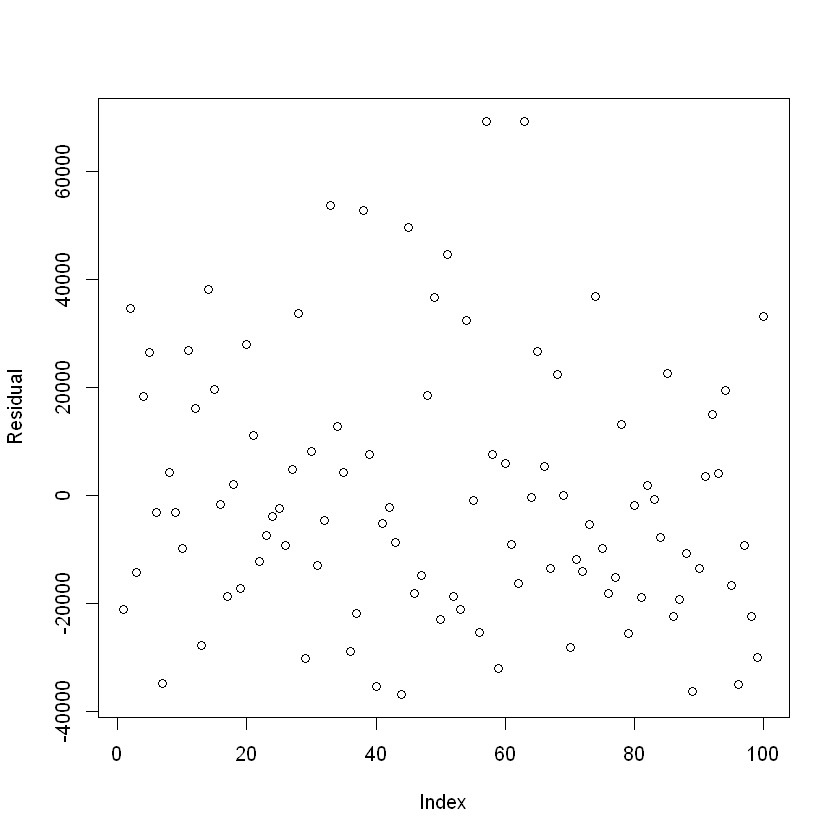

In [28]:
# Examine the residuals to capture any missed relationships 
plot(fit2$residuals, ylab = "Residual")

In [29]:
rmse(fit2$fitted.values, df_cus$annual_salary)

[1] 23767.49

The RMSE of the model over the whole dataset is over $20,000 which indicates the inaccuracy of the model. The model's adjust R-squared also shows that it only explains about 4% of variation  in customers' annual salary. It is thus risky to use this linear model to predict customers' income bracket. More data is required to develop a more reliable model. 

# Build a decision-tree based model to predict salary

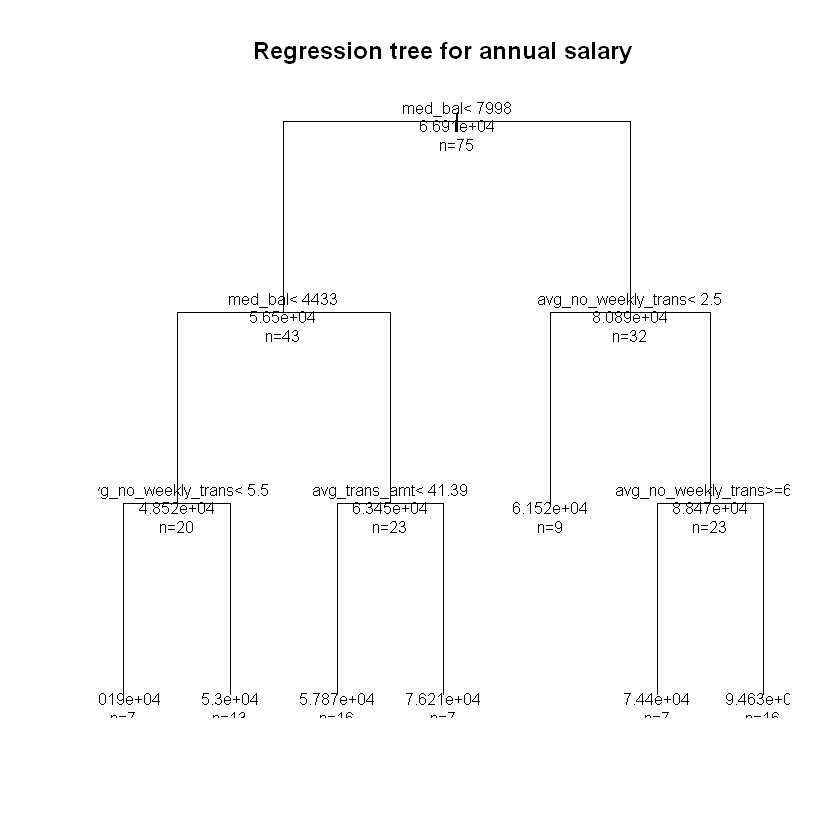

In [30]:
# Split into training and test datasets
smp_size = floor(0.75 * nrow(df_cus))

# Set the seed to make partition reproducible
set.seed(123)
train_ind = sample(seq_len(nrow(df_cus)), size = smp_size)

df_cus_train = df_cus[train_ind, ]
df_cus_test = df_cus[-train_ind, ]

fit3 = rpart(annual_salary ~ gender + age + avg_no_weekly_trans + max_amt + no_large_trans + use_no_day + avg_trans_amt + med_bal + age_below20 + age_btw20n40 + age_btw40n60 + State, method = "anova", data = df_cus_train)

# Plot tree
plot(fit3, uniform = TRUE, main = "Regression tree for annual salary")
text(fit3, use.n = TRUE, all = TRUE, cex = 0.8)

In [31]:
# Examine prediction accuracy
rmse(actual = df_cus_test$annual_salary, predicted = predict(object = fit3, newdata = df_cus_test))

[1] 25809.5